Let me see can i combine and see that can i differentiate the payments using geographical location

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression ## for performing the logistic Regression
from sklearn.metrics import accuracy_score ## to obtain the accuracy score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
payment= pd.read_csv("olist_order_payments_dataset.csv")

In [3]:
customer=pd.read_csv("olist_customers_dataset.csv")

In [4]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
orders= pd.read_csv("olist_orders_dataset.csv")

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
merge=pd.merge(orders,payment, how='outer')

In [9]:
merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12


In [10]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 12 columns):
order_id                         103887 non-null object
customer_id                      103887 non-null object
order_status                     103887 non-null object
order_purchase_timestamp         103887 non-null object
order_approved_at                103712 non-null object
order_delivered_carrier_date     101999 non-null object
order_delivered_customer_date    100755 non-null object
order_estimated_delivery_date    103887 non-null object
payment_sequential               103886 non-null float64
payment_type                     103886 non-null object
payment_installments             103886 non-null float64
payment_value                    103886 non-null float64
dtypes: float64(3), object(9)
memory usage: 10.3+ MB


In [11]:
merge.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
dtype: int64

In [12]:
merge=merge.drop(columns=['order_id','customer_id','order_approved_at','order_delivered_carrier_date'])

In [13]:
merge.head()

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12
1,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00
2,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59
3,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46
4,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12


In [14]:
merge.columns=['order_status','purchase_time','delivery_time','estimated_delivery_time','payment_sequence','payment_type','payment_installments','pay_value']

In [15]:
merge['purchase_time']= pd.to_datetime(merge['purchase_time'], errors='coerce')
merge['delivery_time']= pd.to_datetime(merge['delivery_time'], errors='coerce')
merge['estimated_delivery_time']= pd.to_datetime(merge['estimated_delivery_time'], errors='coerce')

In [16]:
merge.head()

,order_status,purchase_time,delivery_time,estimated_delivery_time,payment_sequence,payment_type,payment_installments,pay_value
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


In [17]:
merge.groupby('payment_type')['pay_value'].mean()

payment_type
boleto         145.034435
credit_card    163.319021
debit_card     142.570170
not_defined      0.000000
voucher         65.703354
Name: pay_value, dtype: float64

I just tried to understand which payment type generates more income to the company anyway more user's uses credit card but it is also important to know how much income is generating in which means

As we seen credit_card 163.31 is an average amount is being spent 
and form debit_card 142.57 is being spent on an average than debit cards it seems to be 'boleto' has more additional benefit

In [18]:
merge['payment_sequence'].value_counts()

1.0     99360
2.0      3039
3.0       581
4.0       278
5.0       170
6.0       118
7.0        82
8.0        54
9.0        43
10.0       34
11.0       29
12.0       21
13.0       13
14.0       10
15.0        8
16.0        6
17.0        6
18.0        6
19.0        6
21.0        4
20.0        4
22.0        3
26.0        2
24.0        2
25.0        2
23.0        2
29.0        1
27.0        1
28.0        1
Name: payment_sequence, dtype: int64

In [19]:
merge.groupby('payment_type')['payment_sequence','payment_installments'].mean()

,payment_sequence,payment_installments
payment_type,,
boleto,1.000051,1.000000
credit_card,1.004167,3.507155
debit_card,1.034663,1.000000
not_defined,1.000000,1.000000
voucher,2.602424,1.000000


So, it seems to be thta voucher has been used on an average to make payments and credit card is used to make payment on minimum of 3-4 times which ment installments 

Which tells most of the users by high products on credit basis than one type payments

In [20]:
merge['order_status'].value_counts()

delivered      100757
shipped          1166
canceled          664
unavailable       649
invoiced          325
processing        319
created             5
approved            2
Name: order_status, dtype: int64

In [21]:
merge.groupby('order_status')['estimated_delivery_time'].size()

order_status
approved            2
canceled          664
created             5
delivered      100757
invoiced          325
processing        319
shipped          1166
unavailable       649
Name: estimated_delivery_time, dtype: int64

Here, you can see there are few products which has become unavailable which means is it lost in transit?? or is it just unavaliable to ship the product but if the product is unavaliable customer won't pay and wait for delivery 

In [22]:
merge.groupby('payment_type')['payment_sequence'].size()

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
Name: payment_sequence, dtype: int64

We know that credit card is the most frequent way to pay and I just drawn that may be the only type but now I understood that "boleto" is also one of the famous or wanted pay type 

But reason I tried to do differently that i wanted to see with payment sequence and installment 

In [23]:
merge.head()

,order_status,purchase_time,delivery_time,estimated_delivery_time,payment_sequence,payment_type,payment_installments,pay_value
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


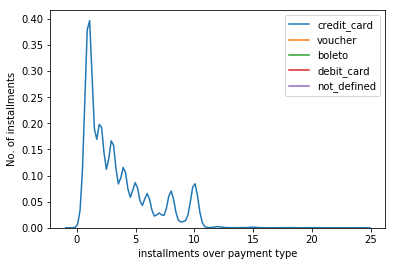

In [26]:
sns.kdeplot(merge.loc[merge['payment_type']== 'credit_card',"payment_installments"],label='credit_card');
sns.kdeplot(merge.loc[merge['payment_type']== 'voucher' ,"payment_installments"],label='voucher');
sns.kdeplot(merge.loc[merge['payment_type']== 'boleto',"payment_installments"],label='boleto');
sns.kdeplot(merge.loc[merge['payment_type']== 'debit_card',"payment_installments"],label='debit_card');
sns.kdeplot(merge.loc[merge['payment_type']== 'not_defined',"payment_installments"],label='not_defined');


# beautifying the labels
plt.xlabel('installments over payment type')
plt.ylabel('No. of installments')
plt.show()

>so it is proveded that if people are taking on installment basis then it would be only credit_card

You cannot use boleto for installments